# IQ modulation for Chirp

http://zone.ni.com/reference/en-XX/help/372058T-01/nirfsa/iq_modulation/

## IQ modulation

http://zone.ni.com/reference/en-XX/help/372058T-01/nirfsa/iq_modulation/

### Modulation

$$ I(t) = R(t) \cos(\omega_b t) $$

$$ Q(t) = R(t) \sin(\omega_b t) $$

$$ p(t) = I(t) \cos(\omega_c t) - Q(t) \sin(\omega_c t) = R(t) \cos(\omega_c t + \omega_b t)$$

In case of Chirp, R(t) is constant (Amplitude):

$$ k = \frac{f_1-f_0}{T} $$

$$ \omega_b(t) = 2\pi \left(f_0 + \frac{k}{2} t \right) $$

$$ I(t) = A \cos(\omega_b(t) t) $$

$$ Q(t) = A \sin(\omega_b(t) t) $$

$$ p(t) = I(t) \cos(\omega_c t) - Q(t) \sin(\omega_c t) = A \cos(\omega_c t + \omega_b(t) t)$$

### Demodulation

After low-pass filter,

$$ I(t) = p(t) \cos(\omega_c t)  $$

$$ Q(t) = p(t) \sin(\omega_c t)  $$

In [245]:
%matplotlib inline
% run ./chirp.py

In [246]:
# Chirp bandwidth in Hz
BW = 2000

# Carrier in Hz
CARRIER=18000

In [247]:
F0 = -BW/2
F1 = +BW/2

In [248]:
def carrier_IQ(iq, f=CARRIER, T=TIME_FRAME):
    t = linspace(0, T, int(T * Fs))
    if iq == 'I':
        return cos(2 * pi * f * t)
    elif iq == 'Q':
        return sin(2 * pi * f * t)
    
def chirp_x_carrier(f0=F0, f1=F1, T=TIME_FRAME, updown="up"):
    t = linspace(0, T, int(T * Fs))
    k = float(abs(f0-f1))/float(T)
    if (updown == "up"):
        f = f0 + k * t / 2.0
    elif (updown == "down"):
        f = f1 - k * t / 2.0
    arg = 2 * pi * (CARRIER + f) * t
    return cos(arg) * AMPLITUDE

from scipy.signal import buttord, butter, lfilter

def lpf(f, cutoff):
    WP = float(cutoff)/float(Fs/2)
    WS = 1.3 * WP
    N, Wn = buttord(wp=WP, ws=WS, gpass=2, gstop=30, analog=0)
    b, a = butter(N, Wn, btype='low', analog=0, output='ba')
    g = lfilter(b, a, f)
    return g

## Carrier

In [249]:
Ci = carrier_IQ('I')
Cq = carrier_IQ('Q')

Frequencies at peaks: [-18000.  18000.] Hz


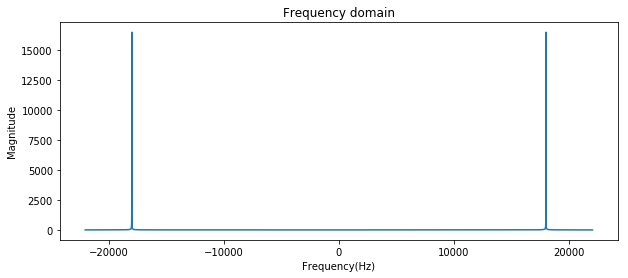

In [250]:
plot_fft(Ci)

Frequencies at peaks: [-18000.  18000.] Hz


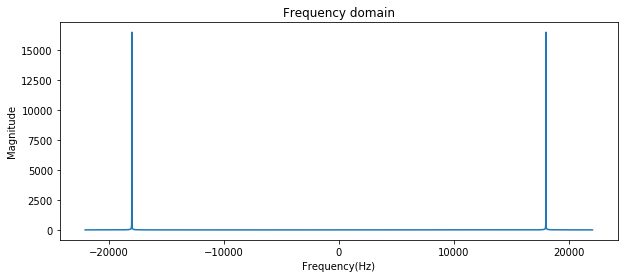

In [251]:
plot_fft(Cq)

## Baseband signal

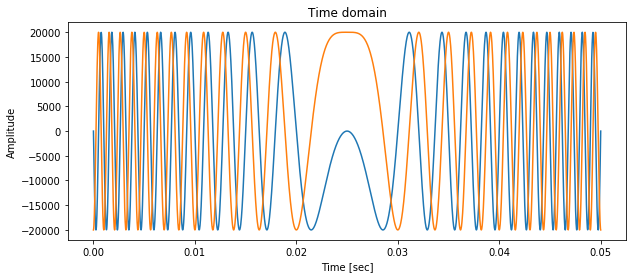

In [252]:
plot_wave(chirp(f0=F0, f1=F1, T=0.05), real_only=False)

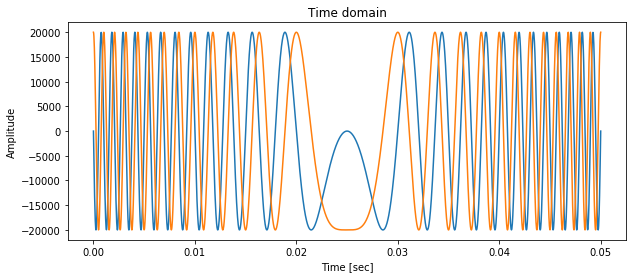

In [253]:
plot_wave(chirp(f0=F0, f1=F1, T=0.05).conjugate(), real_only=False)

## I/Q modulation 

In [254]:
WW = chirp_x_carrier(f0=F0, f1=F1, T=0.05)
WWd = chirp_x_carrier(f0=F0, f1=F1, T=0.05, updown="down")

Frequencies at peaks: [-18840. -17180.  17180.  18840.] Hz


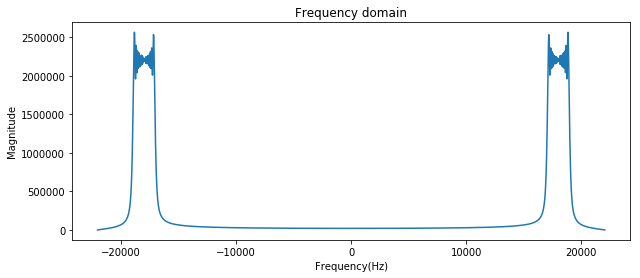

In [255]:
plot_fft(WW)

## I/Q demodulation

In [256]:
Ri = WW*carrier_IQ('I', T=0.05)
Rq = WW*carrier_IQ('Q', T=0.05)
Rid = WWd*carrier_IQ('I', T=0.05)
Rqd = WWd*carrier_IQ('Q', T=0.05)

Frequencies at peaks: [-780. -700. -640. -540. -500. -460. -360. -300. -220. -100.  100.  220.
  300.  360.  460.  500.  540.  640.  700.  780.] Hz


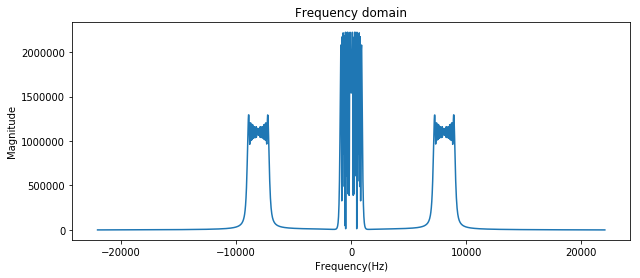

In [257]:
plot_fft(Ri)

Frequencies at peaks: [-820.  820.] Hz


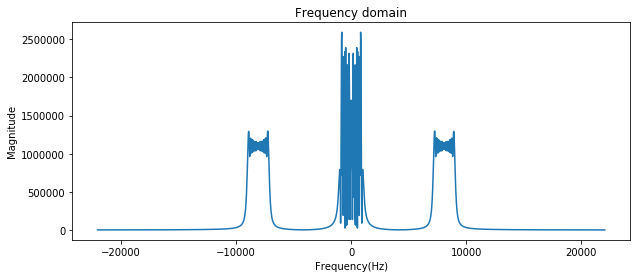

In [258]:
plot_fft(Rq)

## Low-pass filter to remove 2 * carrier frequency terms

In [259]:
# LPF
R = lpf(Ri + 1j*Rq, 3000)
Rd = lpf(Rid + 1j*Rqd, 3000)

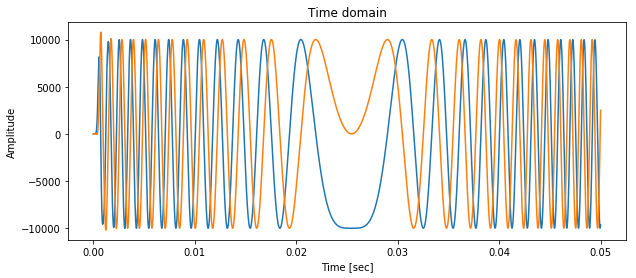

In [260]:
plot_wave(R, real_only=False)

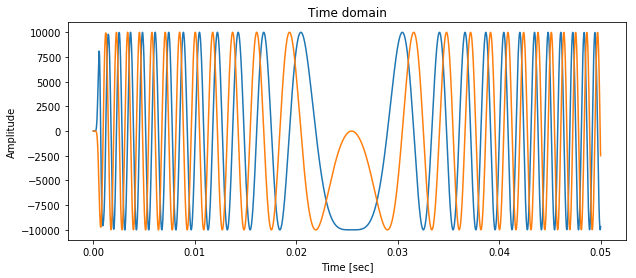

In [261]:
plot_wave(Rd, real_only=False)

Frequencies at peaks: [-820.  840.] Hz


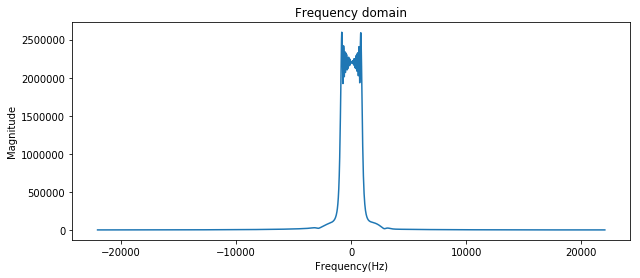

In [262]:
plot_fft(R)

Frequencies at peaks: [-840.  820.] Hz


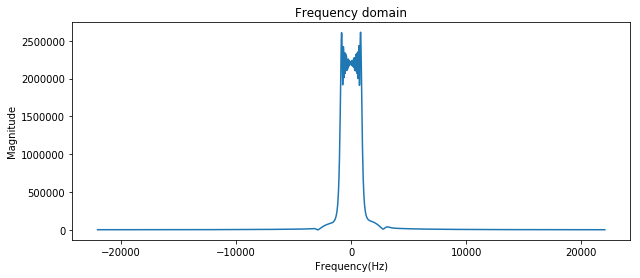

In [263]:
plot_fft(Rd)

## Anlyzing baseband signal

Frequencies at peaks: [20.] Hz


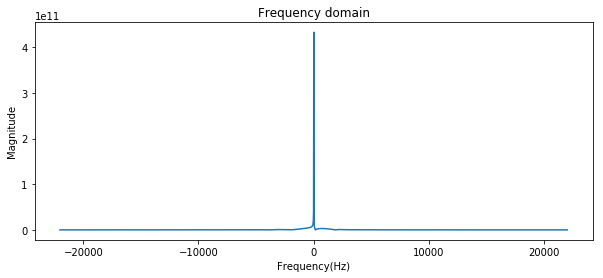

In [264]:
# Up-chirp detection 
plot_fft(R*chirp(f0=F0, f1=F1, T=0.05, updown="up"), logscale=False)

Frequencies at peaks: [-1740.  1740.] Hz


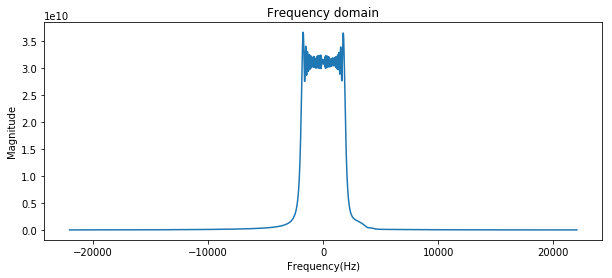

In [265]:
plot_fft(R*chirp(f0=F0, f1=F1, T=0.05, updown="down"), logscale=False)

Frequencies at peaks: [-1740.  1740.] Hz


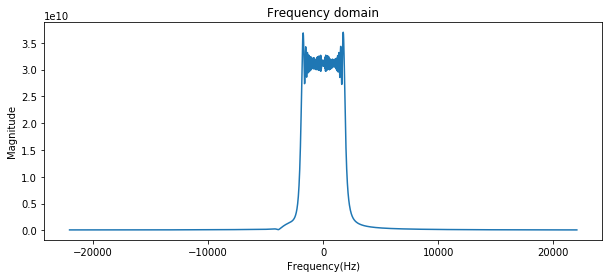

In [266]:
# Down-chirp detection 
plot_fft(Rd*chirp(f0=F0, f1=F1, T=0.05, updown="up"), logscale=False)

Frequencies at peaks: [-20.] Hz


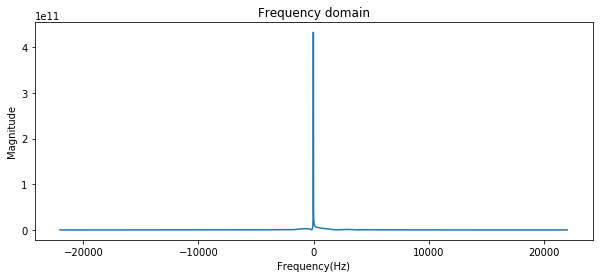

In [267]:
plot_fft(Rd*chirp(f0=F0, f1=F1, T=0.05, updown="down"), logscale=False)